Background: An investigation into 1912 Titanic incidents to determine how demographic factors influenced a passenger's propobability of survival.

Objective: To build a Binary Classification model to predict passenger survival based on their personal characteristics

Abbreviation:

1. Pclass: Passenger class
2. SibSp: Siblings and spouses
3. Parch: Parent and children
4. Embarked: Port of embarkation

In [1]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv('train.csv') 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [4]:
train['Age'].fillna(train['Age'].median(), inplace=True)
        
embark_mode = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(embark_mode)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\peiyi\AppData\Local\Temp\ipykernel_19360\899974674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [5]:
test['Age'].fillna(test['Age'].median(), inplace=True)

embark_mode = test['Embarked'].mode()[0]
test['Embarked'] = test['Embarked'].fillna(embark_mode)

test['Fare'].fillna(test['Fare'].median(), inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


C:\Users\peiyi\AppData\Local\Temp\ipykernel_19360\3047109435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)
C:\Users\peiyi\AppData\Local\Temp\ipykernel_19360\3047109435.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [6]:
train['Sex1'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex1'] = test['Sex'].map({'female': 0, 'male': 1})

# train['Cabin1'] = train['Cabin'].notnull().astype(int)
# test['Cabin1'] = test['Cabin'].notnull().astype(int)

train['Embarked1'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test['Embarked1'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

train['Is_Alone'] = (train['Family_Size'] == 1).astype(int)
test['Is_Alone'] = (test['Family_Size'] == 1).astype(int)

train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

train['Is_Alone'] = 0
train.loc[train['Family_Size'] == 1, 'Is_Alone'] = 1

test['Is_Alone'] = 0
test.loc[test['Family_Size'] == 1, 'Is_Alone'] = 1

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Sex1         891 non-null    int64  
 13  Embarked1    891 non-null    int64  
 14  Family_Size  891 non-null    int64  
 15  Is_Alone     891 non-null    int64  
dtypes: float64(2), int64(9), object(5)
memory usage: 111.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 41

- Mr
- Mrs / Mme
- Miss / Ms / Mlle
- Master
- Don: A spanish title for a nobleman
- Rev (Reverend): A member of the clergy/minister
- Dr
- Major / Col (Colonel) / Capt (Captain)
- Lady
- Sir
- the Countess: A hihg-ranking noblewoman
- Jonkheer: A dutch noble title (the lowest rank of nobility in the Netherlands)

In [7]:
# 1. Extract the title (the word ending with a dot)
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 2. Group the Rare and synonymous titles
def group_titles(df):
    # Grouping high-status and professional titles as 'Rare'
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                       'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    # Cleaning up synonyms
    df['Title'] = df['Title'].replace('Mlle', 'Miss') # Mademoiselle -> Miss
    df['Title'] = df['Title'].replace('Ms', 'Miss')   # Ms -> Miss
    df['Title'] = df['Title'].replace('Mme', 'Mrs')    # Madame -> Mrs
    return df

train = group_titles(train)
test = group_titles(test)

# 3. Map to numbers for the model
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title1'] = train['Title'].map(title_mapping)
test['Title1'] = test['Title'].map(title_mapping)

In [8]:
features = ['Pclass', 'Age', 'Fare', 'Sex1', 'Embarked1', 'Family_Size', 'Is_Alone', 'Title1']

X_train = train[features]
y_train = train['Survived']
X_test = test[features]

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=27)

#to put all features on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:10]

array([[ 0.82199504, -0.58800835, -0.51063007,  0.73669883,  0.58981648,
        -0.56748021,  0.79577122, -0.69571506],
       [ 0.82199504, -1.04724753, -0.507343  ,  0.73669883,  0.58981648,
        -0.56748021,  0.79577122, -0.69571506],
       [ 0.82199504, -0.12876916,  0.52537316,  0.73669883,  0.58981648,
        -0.56748021,  0.79577122, -0.69571506],
       [ 0.82199504, -1.42994686, -0.01225709, -1.35740679,  0.58981648,
         3.53064716, -1.25664258,  0.29944053],
       [-0.36909539, -0.66454821,  0.88785065,  0.73669883,  0.58981648,
         0.79856225, -1.25664258, -0.69571506],
       [ 0.82199504, -1.58302659, -0.08420176, -1.35740679,  0.58981648,
         2.84762593, -1.25664258,  0.29944053],
       [-1.56018582,  0.02431057,  0.53461192, -1.35740679, -1.94392891,
        -0.56748021,  0.79577122,  0.29944053],
       [-0.36909539, -2.20835729, -0.06075313,  0.73669883,  0.58981648,
         0.79856225, -1.25664258,  2.28975172],
       [ 0.82199504, -2.19534551

In [10]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', class_weight='balanced', random_state=27), 
                           param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(f'Best C value: {grid_search.best_params_['C']}')

Best C value: 1


In [11]:
y_pred = best_model.predict(X_val_scaled)

cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

array([[113,  25],
       [ 20,  65]])

- True negative (Not Survived): 111
- False positive (Type I Error): 27
- False negative (Type II Error): 21
- True positive (Survived): 64

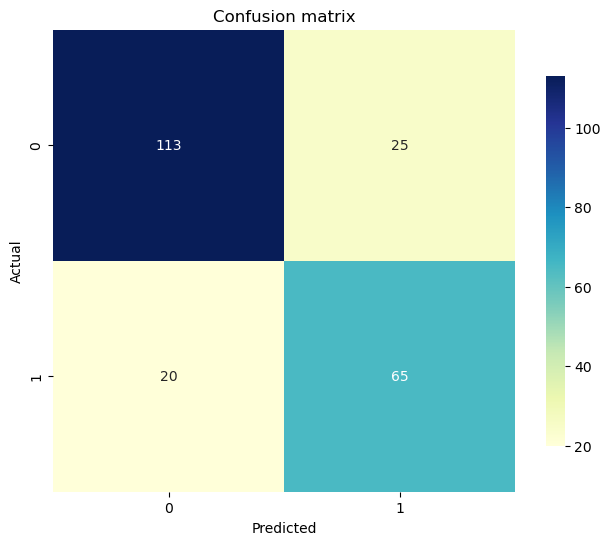

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, 
            annot=True, 
            fmt='.0f', 
            cmap='YlGnBu', 
            square=True, 
            cbar_kws={'shrink': 0.8})  
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
target_names = ['died', 'survived']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        died       0.85      0.82      0.83       138
    survived       0.72      0.76      0.74        85

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



A 80% accuracy is a strong result for this dataset. It significantly outperforms the 65% baseline and sits at the upper end of what Logistic Regression typically achieves on a data (75-80%). The False Negative risk is 24%, meaning the model now would identifies approximately 8 out of 10 survivor, missing only 2.

In [14]:
y_test = best_model.predict(X_test_scaled)
test['Predicted Survival'] = y_test
test['Predicted Survival'] = test['Predicted Survival'].map({0: 'Died', 1: 'Survived'})
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1,Embarked1,Family_Size,Is_Alone,Title,Title1,Predicted Survival
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,1,1,Mr,1,Died
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2,2,0,Mrs,3,Survived
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,1,1,Mr,1,Died
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,2,1,1,Mr,1,Died
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,2,3,0,Mrs,3,Survived


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Name                418 non-null    object 
 3   Sex                 418 non-null    object 
 4   Age                 418 non-null    float64
 5   SibSp               418 non-null    int64  
 6   Parch               418 non-null    int64  
 7   Ticket              418 non-null    object 
 8   Fare                418 non-null    float64
 9   Cabin               91 non-null     object 
 10  Embarked            418 non-null    object 
 11  Sex1                418 non-null    int64  
 12  Embarked1           418 non-null    int64  
 13  Family_Size         418 non-null    int64  
 14  Is_Alone            418 non-null    int64  
 15  Title               418 non-null    object 
 16  Title1  

In [16]:
Summary = pd.pivot_table(test, index='Predicted Survival', columns='Sex', values='PassengerId', aggfunc='count', fill_value=0)
Summary.reset_index(inplace=True)
Summary.columns.name = None
Summary.index.name = None
Summary['Total'] = Summary['female'] + Summary['male']
Summary

,Predicted Survival,female,male,Total
0,Died,4,235,239
1,Survived,148,31,179


With 80% accuracy, the overall survival rate is 42.8% (179 survivor). There are 97% of  females but only 11% of males survived. Without the titles extraction, the survival rate for males might be lower.

Reference: https://amanxai.com/2020/08/25/titanic-survival-with-machine-learning/